# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**Saurabh Vijaykumar Gaikwad

# **Project Summary -**

Predicting coronary heart disease in advance helps raise awareness for the disease. Preventive measurements like changing diet plans and exercise can slow down the progression of CHD. Early prediction can result in early diagnosis. So, we can treat the disease at an early stage and avoid more invasive treatment.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

The goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Alma Better/Classification/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#copy dataset in other variable
df=dataset.copy()

In [6]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Text(0.5, 1.0, 'Visualizing the missing values')

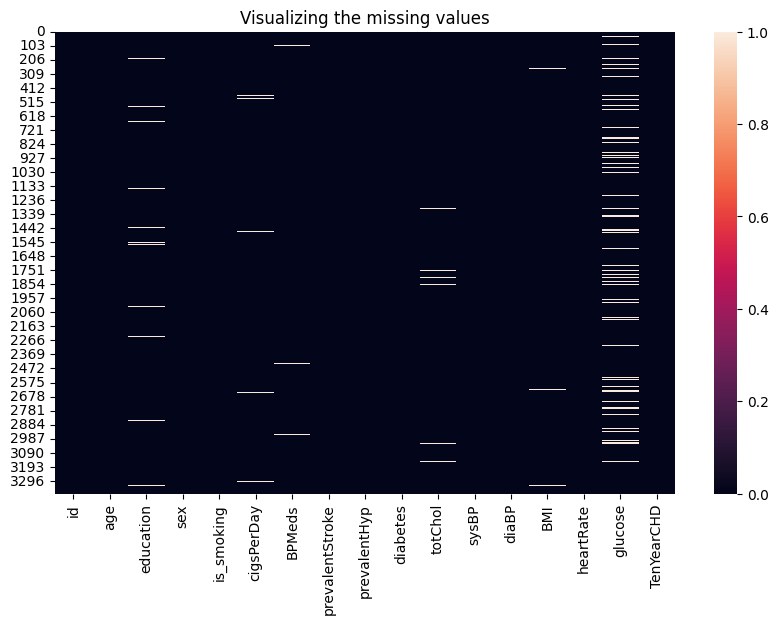

In [12]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title('Visualizing the missing values')

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print('Unique values in ',i," ",df[i].nunique())

Unique values in  id   3390
Unique values in  age   39
Unique values in  education   4
Unique values in  sex   2
Unique values in  is_smoking   2
Unique values in  cigsPerDay   32
Unique values in  BPMeds   2
Unique values in  prevalentStroke   2
Unique values in  prevalentHyp   2
Unique values in  diabetes   2
Unique values in  totChol   240
Unique values in  sysBP   226
Unique values in  diaBP   142
Unique values in  BMI   1259
Unique values in  heartRate   68
Unique values in  glucose   132
Unique values in  TenYearCHD   2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
df.drop('id',axis=1,inplace=True)

In [17]:
# Write your code to make your dataset analysis ready.
df['sex']=np.where(df['sex']=='M',1,0)
df['is_smoking']=np.where(df['is_smoking']=='YES',1,0)

## Handling Missing Data

In [18]:
df.isna().sum().sum()

510

In [19]:
#Replace missing value in the categoticalcolumns with mode
df['education']=df['education'].fillna(df['education'].mode()[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [20]:
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [21]:
df.BPMeds.value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [22]:
#Mean and median number of cigarettes per day
df.cigsPerDay.mean().round,df.cigsPerDay.median()

(<function float64.round>, 0.0)

In [23]:
df[df['cigsPerDay'].isna()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [24]:
#mean and median cigarettes/day for a smoker exclude non-smoker
df[df['is_smoking']==1]['cigsPerDay'].mean(),df[df['is_smoking']==1]['cigsPerDay'].median()

(18.345945945945946, 20.0)



*   Mean of cigarettes for smoker=18.3459459
*   Median of cigarettes for smoker=20.0



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'outliers in cigsPerDay')

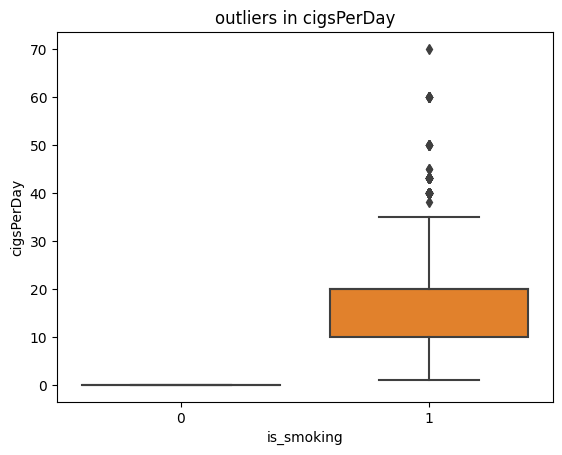

In [25]:
# Boxplot to display the outliers in cigsPerDay
sns.boxplot(x=df['is_smoking'],y=df['cigsPerDay'])
plt.xlabel('is_smoking')
plt.ylabel('cigsPerDay')
plt.title('outliers in cigsPerDay')

##### 1. Why did you pick the specific chart?

Because this boxplot is easily display the outliers contain in the entity.

Here we can see number of cigarettes smoked or not per day. As it contain some missing values so we have to fill them.

In [26]:
# impute the missing values
df['cigsPerDay']=df['cigsPerDay'].fillna(df[df['is_smoking']==1]['cigsPerDay'].median())

<Axes: >

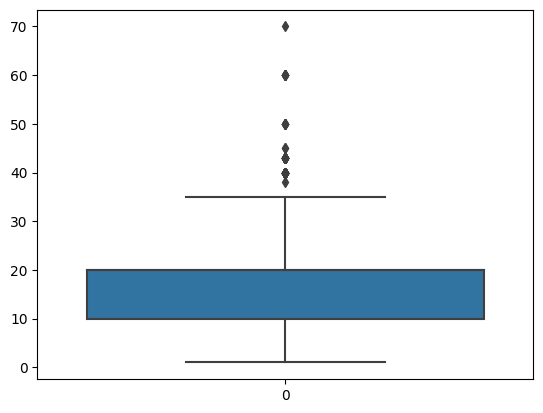

In [27]:
sns.boxplot(df[df['is_smoking']==1]['cigsPerDay'])

#### Chart - 2

Text(0.5, 1.0, 'Boxplot to display outliers')

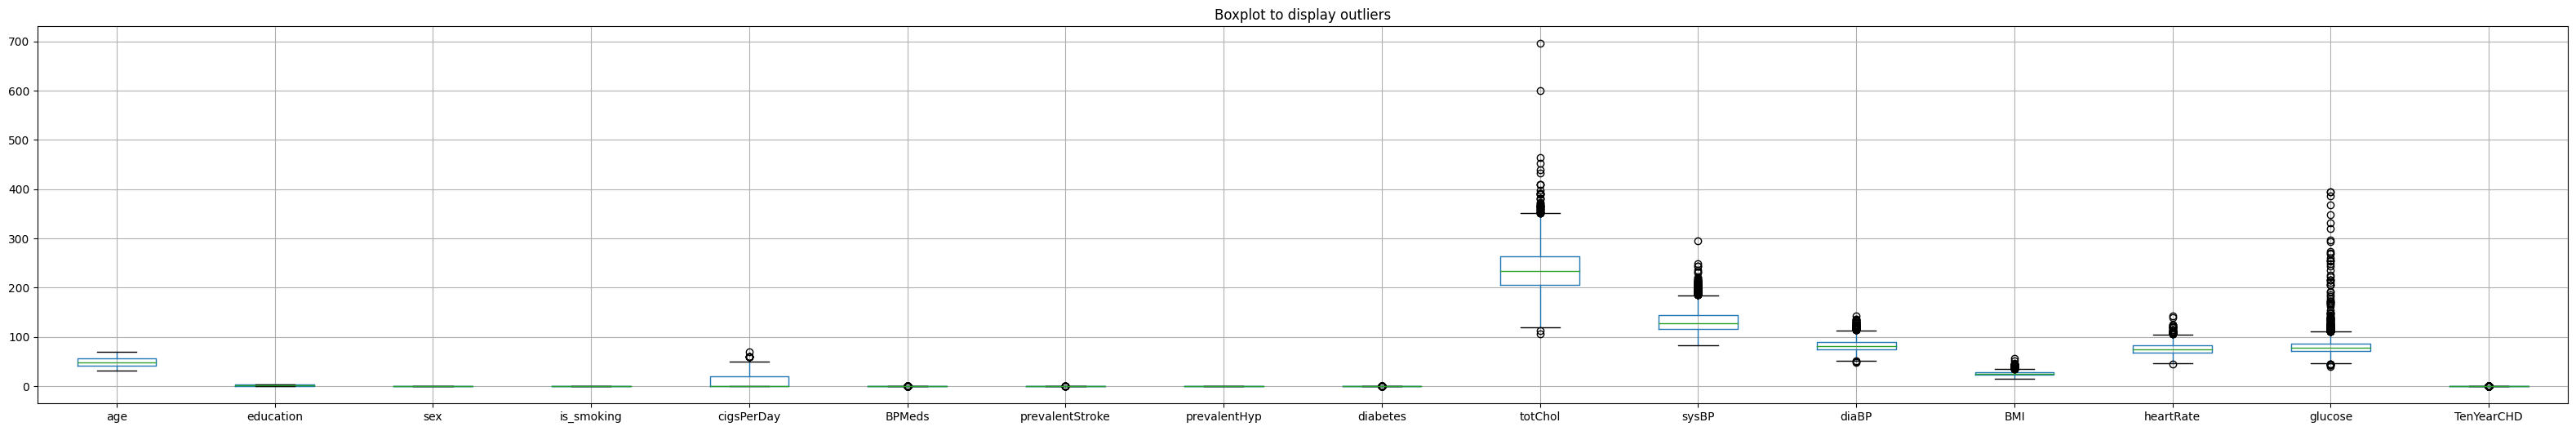

In [28]:
# Boxplot to display outliers
plt.figure(figsize=(40,6))
df.boxplot()
plt.title('Boxplot to display outliers')

##### 1. Why did you pick the specific chart?

It show the outlier in each feature.

Here the outliers are present and they are in possible range.

#### Chart - 3
## HeatMap

<Axes: >

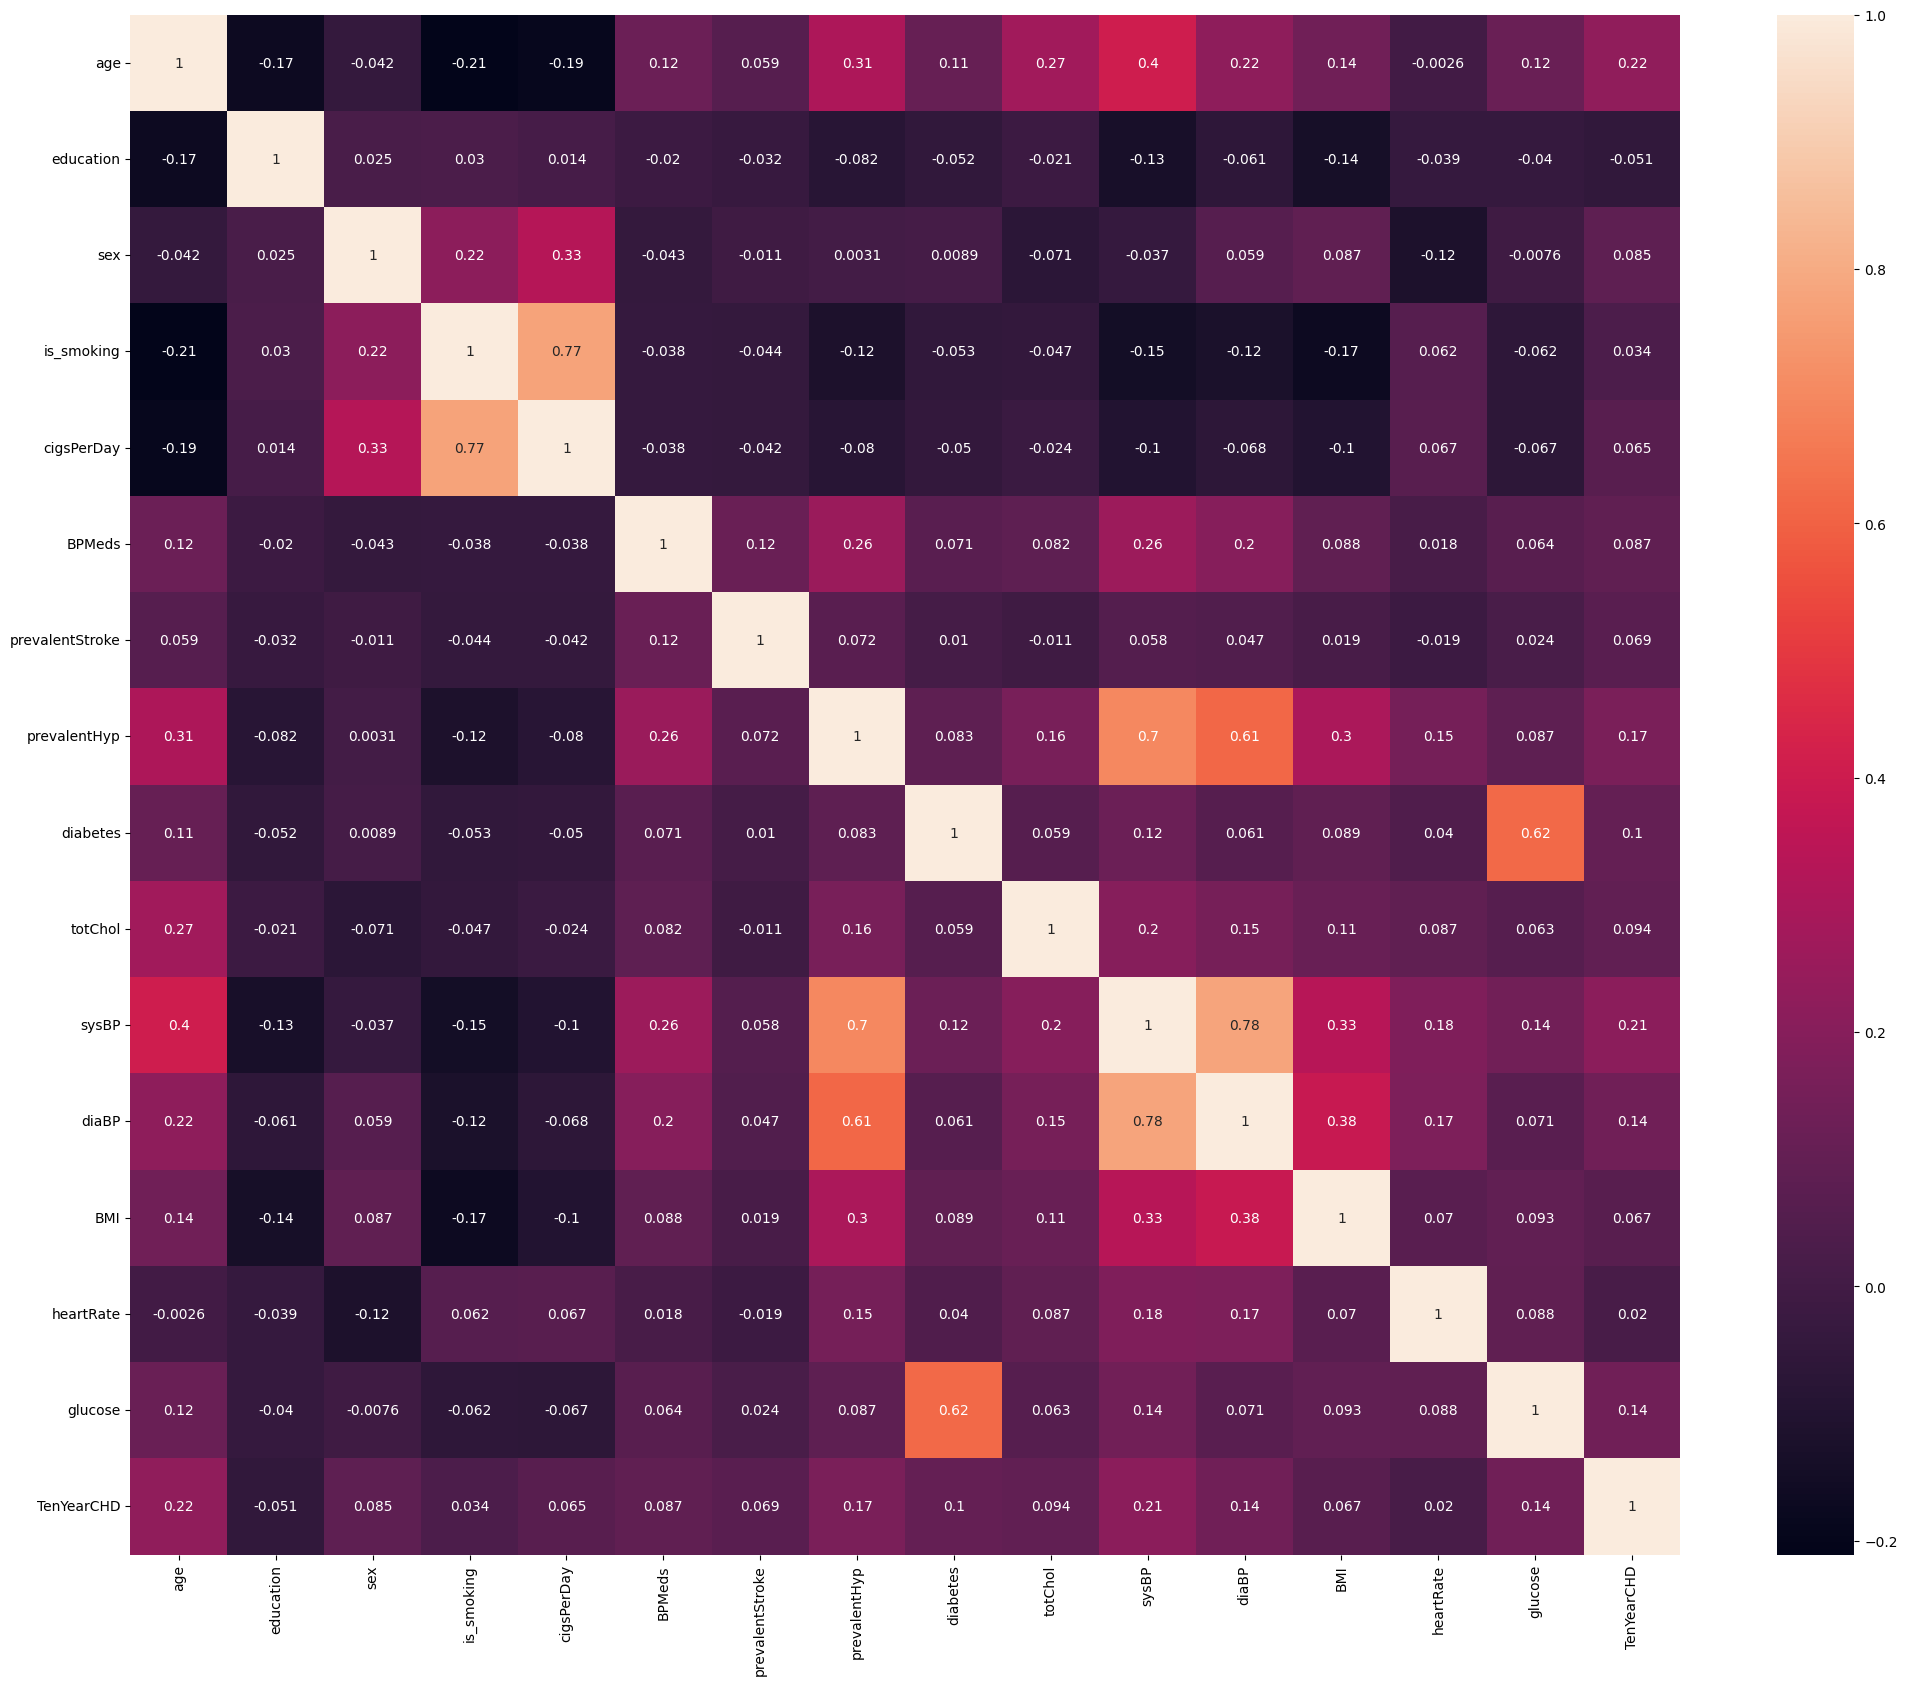

In [29]:
# Chart - 3 visualization code
plt.figure(figsize=(25,20))
corr=df.corr()
sns.heatmap(corr,annot=True)

##### 1. Why did you pick the specific chart?

As heatmap display corrilation between i used heat map to know the relationship between the features.

#### Chart - 4

Text(0.5, 1.0, 'count of mens and females at CHD risk')

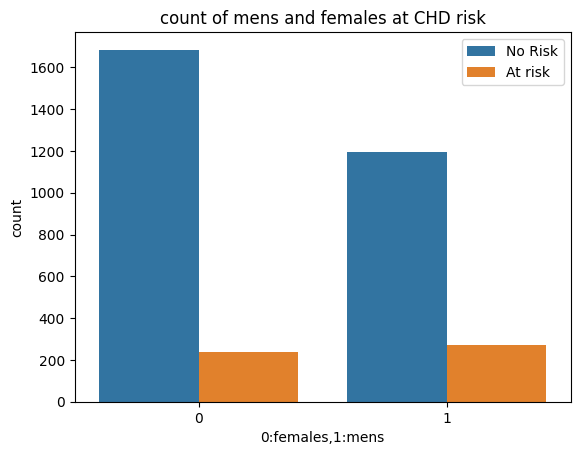

In [30]:
# What is the count of mens and females at CHD risk?:- 
sns.countplot(x=df['sex'],hue=df['TenYearCHD'])
plt.xlabel('0:females,1:mens')
plt.legend(['No Risk','At risk'])
plt.title('count of mens and females at CHD risk')

##### 1. Why did you pick the specific chart?

countplot is used to display the count of features.

#### Chart - 5

Text(0.5, 1.0, ' CHD risk count for patient smoking')

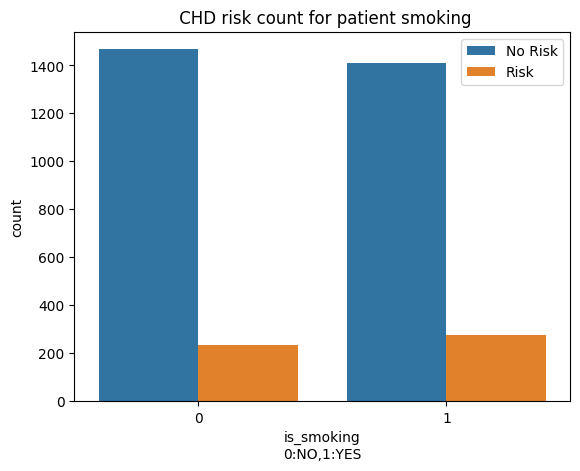

In [31]:
#Are Smokers Are more risk of chd ?
sns.countplot(x=df['is_smoking'],hue=df.TenYearCHD)
plt.xlabel('is_smoking' "\n" '0:NO,1:YES')
plt.legend(['No Risk','Risk'])
plt.title(' CHD risk count for patient smoking')

This count plot shows the number of people at CHD risk with and without smoking



#### Chart - 6

Text(0.5, 1.0, ' CHD risk count for patient having Diabetes')

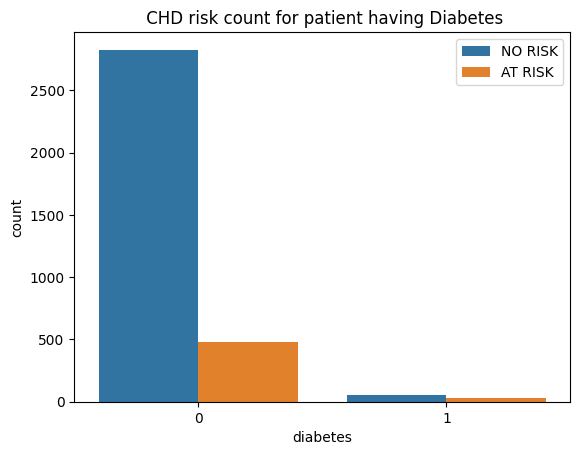

In [32]:
#Dibetic patient at CHD ?
sns.countplot(x=df.diabetes,hue=df.TenYearCHD)
plt.xlabel('diabetes')
plt.legend(['NO RISK','AT RISK'])
plt.title(' CHD risk count for patient having Diabetes')

This count plot display diabetes has no relation with CHD.

#### Chart - 7

Text(0.5, 1.0, 'Patient with BP co-relation with CHD.')

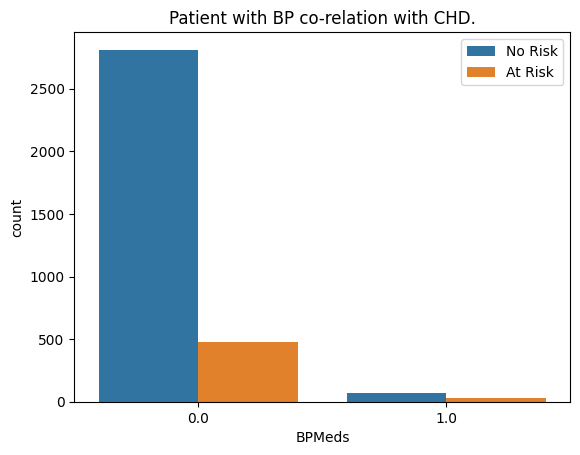

In [33]:
#Patient with BP co-relation with CHD.
sns.countplot(x=df.BPMeds,hue=df.TenYearCHD)
plt.xlabel('BPMeds')
plt.legend(['No Risk','At Risk'])
plt.title('Patient with BP co-relation with CHD.')

This countplot show there is no direct correlation of Bp patient with CHD.

#### Chart - 8

In [34]:

def heartRate_count(a):
    if a['heartRate'] <= 59:
        level = 'Low'
    elif a['heartRate'] < 100:
        level = 'Normal'
    else:
        level = "High"
    
    return level
     

In [35]:
df['heartRateLabel']=df.apply(heartRate_count,axis=1)

Text(0.5, 1.0, 'Heart rate relation with CHD ')

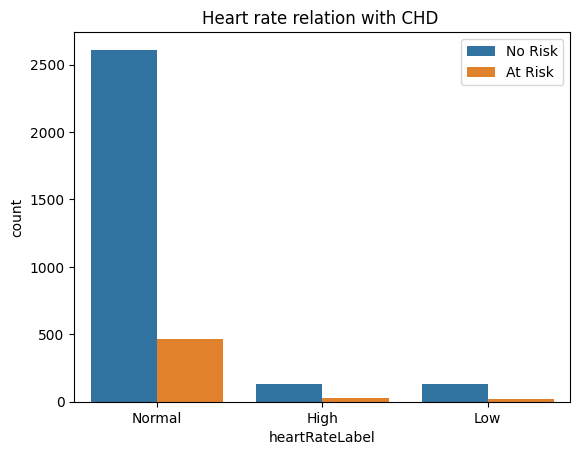

In [36]:
# Heart rate relation with CHD ?
sns.countplot(x=df.heartRateLabel,hue=df.TenYearCHD)
plt.xlabel('heartRateLabel')
plt.legend(['No Risk','At Risk'])
plt.title('Heart rate relation with CHD ')

By using countplot we can  easily observe the difference between the features.

From this countplot we can say that although the heart rate is normal the risk for chd is high.

#### Chart - 9

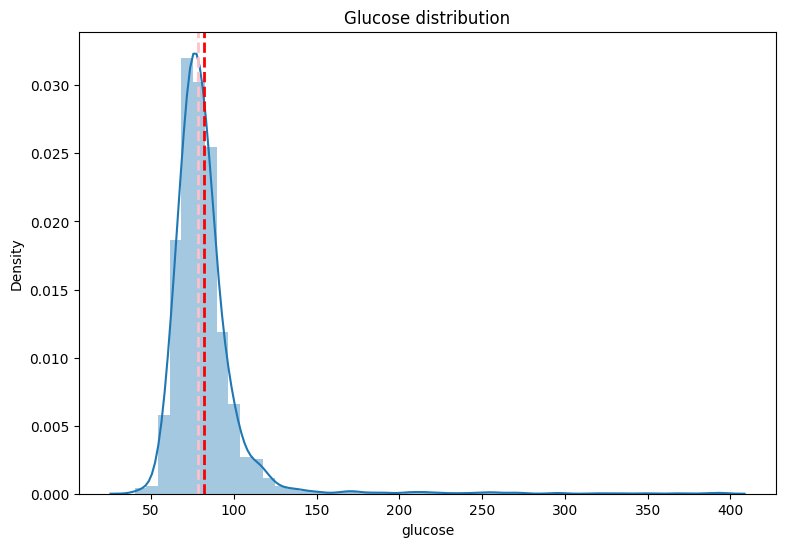

In [37]:
# Chart - 9 visualization code
# glucose Distribution
plt.figure(figsize=(9,6))
sns.distplot(df.glucose)
plt.axvline(df.glucose.mean(),color='red',linestyle='dashed',linewidth=2)
plt.axvline(df.glucose.median(),color='pink',linestyle='dashed',linewidth=2)
plt.title('Glucose distribution')
plt.show()

Her the glucose is positively skewed.

#### Chart - 10

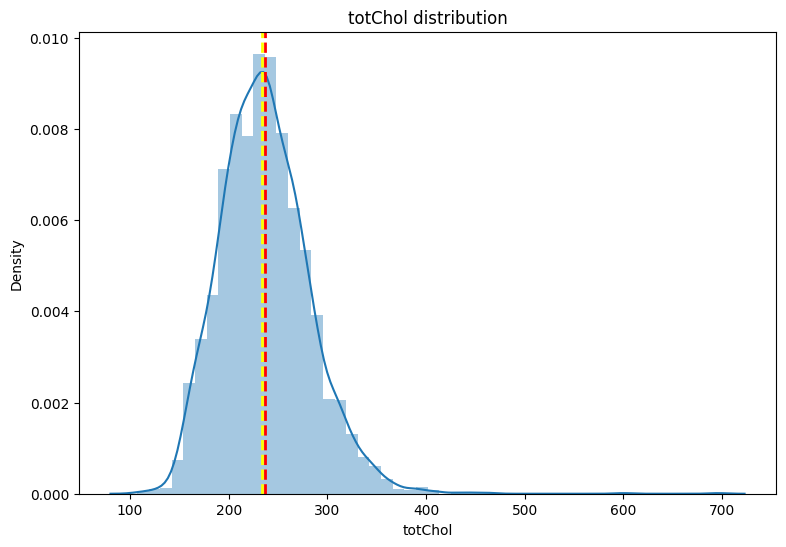

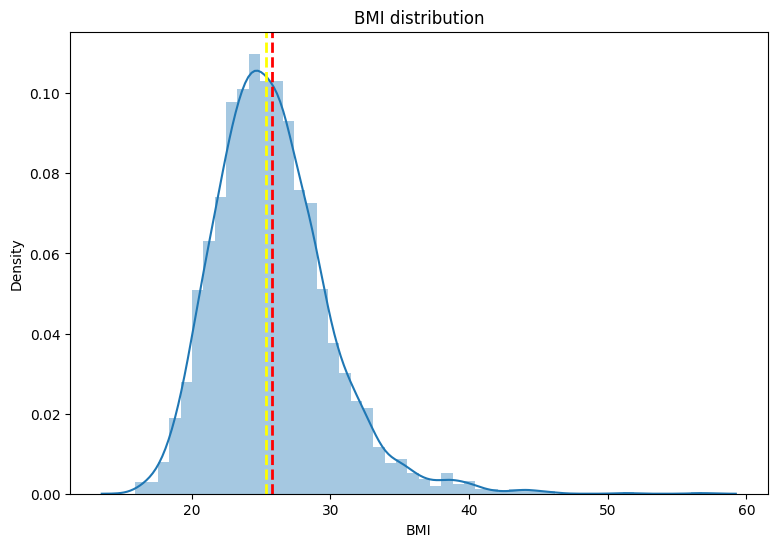

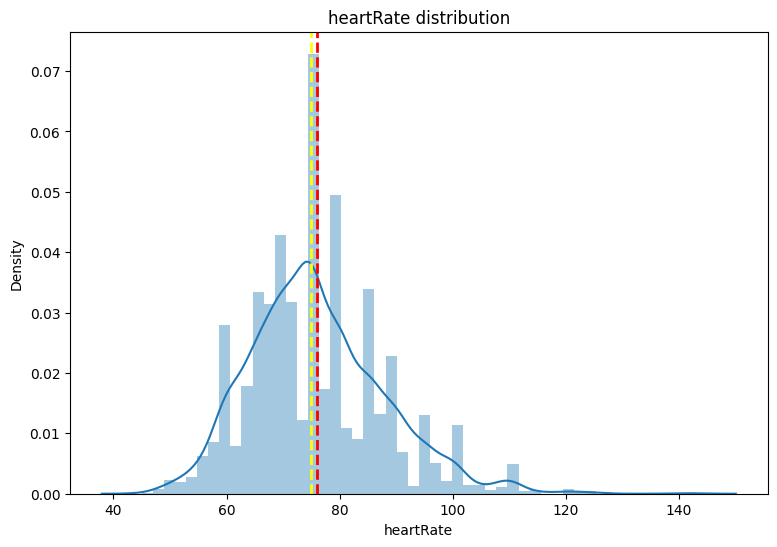

In [38]:
# Chart - 11 visualization code
#total cholestrol,bmi,heartrate
for i in ['totChol','BMI','heartRate']:
  plt.figure(figsize=(9,6))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(),color='red',linestyle='dashed',linewidth=2)
  plt.axvline(df[i].median(),color='yellow',linestyle='dashed',linewidth=2)
  plt.title(i+' distribution')
  plt.show()

# Feature Engineering

In [39]:
# Remove the heartRateLabel which is not valuable for future
df=df.drop(['heartRateLabel'],axis=1)

Since we have some missing values in our dataset we have to deal with them all.

In [40]:
df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

As we can see above some of values are missing so we are filling values with mean and median and using KNN.

In [41]:
#imputing missing values in totchol,BMI,heartRate and in glucose
df['totChol']=df['totChol'].fillna(df['totChol'].median())
df['BMI']=df['BMI'].fillna(df['BMI'].median())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())

In [42]:
#since our glucose contain more number of missing values 
#so instade filling missing values with median value we fill it by using kNN.
imputer=KNNImputer(n_neighbors=10)
imputed=imputer.fit_transform(df)
df=pd.DataFrame(imputed,columns=df.columns)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   education        3390 non-null   float64
 2   sex              3390 non-null   float64
 3   is_smoking       3390 non-null   float64
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   float64
 7   prevalentHyp     3390 non-null   float64
 8   diabetes         3390 non-null   float64
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   float64
dtypes: float64(16)
memory usage: 423.9 KB


# **Handling Multicollinearity**

In [44]:
#Remove collinear variable or assign new variable by adding or subtracting variabels
df['collective_bp']=df['sysBP']-df['diaBP']
df.drop('sysBP',inplace=True,axis=1)
df.drop('diaBP',inplace=True,axis=1)

Text(0.5, 1.0, 'Density plot of collective_bp')

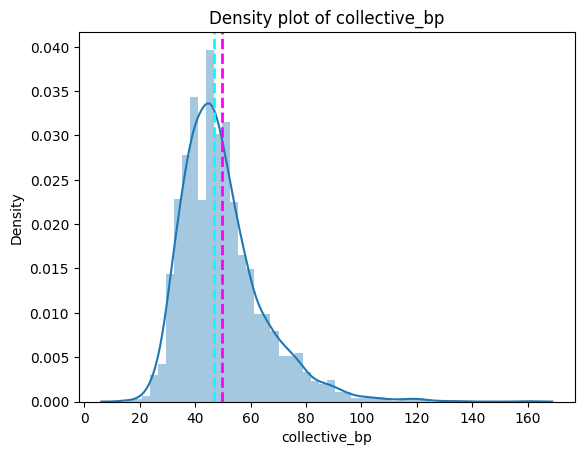

In [45]:
sns.distplot(df['collective_bp'])
plt.axvline(df['collective_bp'].mean(),color='magenta',linestyle='dashed',linewidth=2)
plt.axvline(df['collective_bp'].median(),color='cyan',linestyle='dashed',linewidth=2)
plt.title('Density plot of collective_bp')

In [46]:
continuous_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [47]:
continuous_var.append('collective_bp')

In [48]:
continuous_var.remove('sysBP')
continuous_var.remove('diaBP')

# **Transforming continuous variables to reduce skew,Outliers:**

In [49]:
(df[continuous_var]).skew(axis = 0)

age              0.225796
cigsPerDay       1.204077
totChol          0.948170
BMI              1.025551
heartRate        0.676660
glucose          6.361911
collective_bp    1.412382
dtype: float64

In [50]:
np.log10(df[continuous_var]+1).skew(axis = 0)

age             -0.015053
cigsPerDay       0.275072
totChol          0.011860
BMI              0.370422
heartRate        0.165898
glucose          2.310918
collective_bp    0.354174
dtype: float64

In [51]:

# Implementing log transformation on continuous variables

df['age']                   = np.log10(df['age']+1)
df['cigsPerDay']          = np.log10(df['cigsPerDay']+1)
df['totChol']     = np.log10(df['totChol']+1)
df['BMI']                   = np.log10(df['BMI']+1)
df['heartRate']            = np.log10(df['heartRate']+1)
df['glucose']               = np.log10(df['glucose']+1)
df['collective_bp']        = np.log10(df['collective_bp']+1)
     

In [52]:
df[continuous_var].skew(axis = 0)

age             -0.015053
cigsPerDay       0.275072
totChol          0.011860
BMI              0.370422
heartRate        0.165898
glucose          2.310918
collective_bp    0.354174
dtype: float64

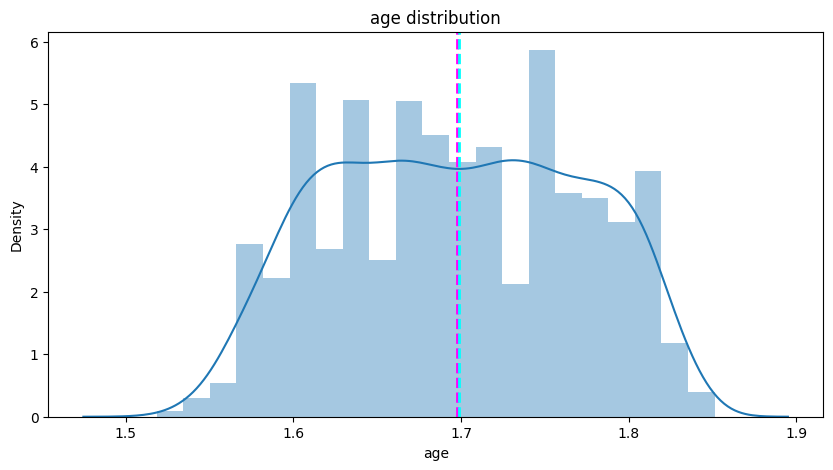

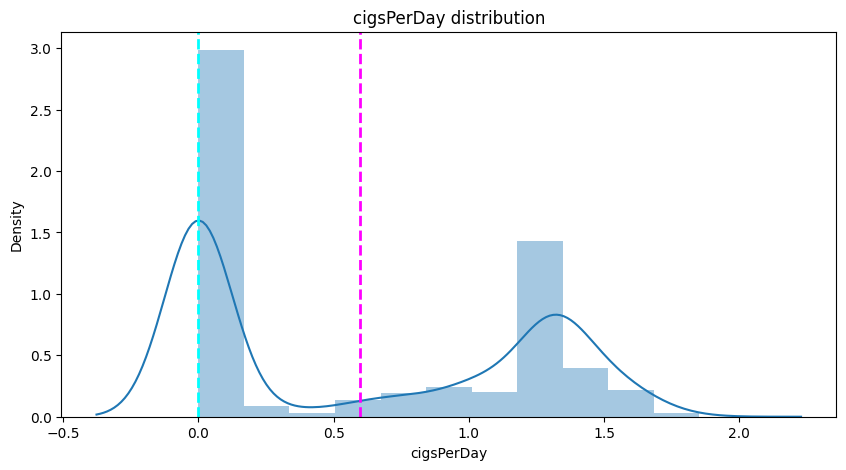

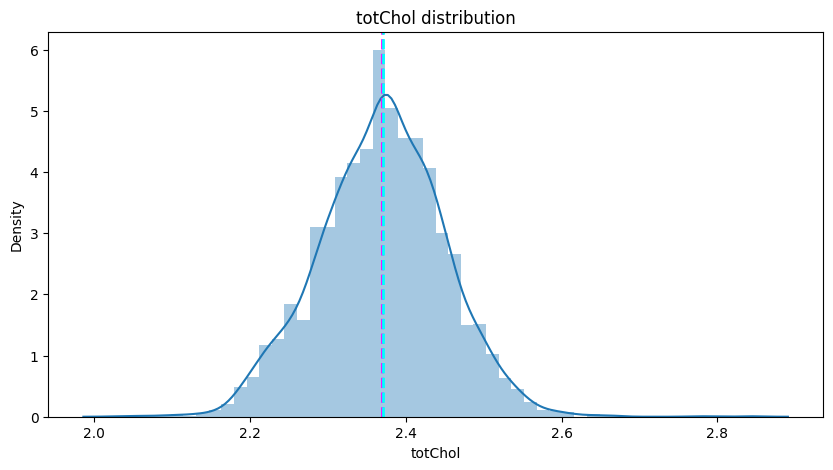

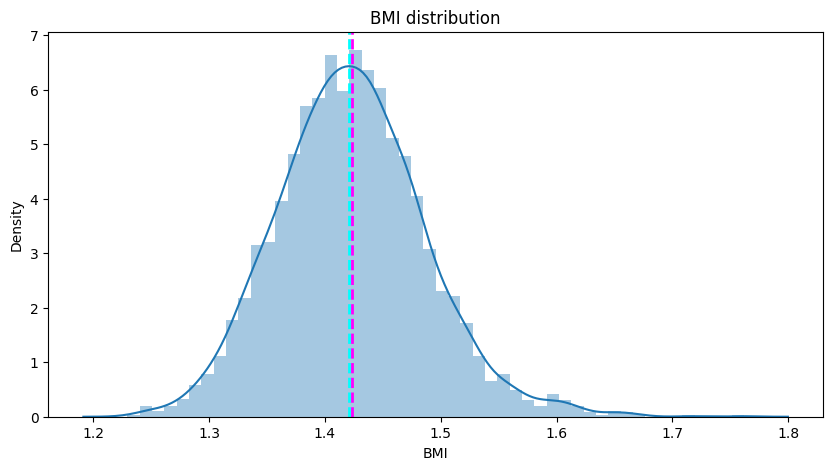

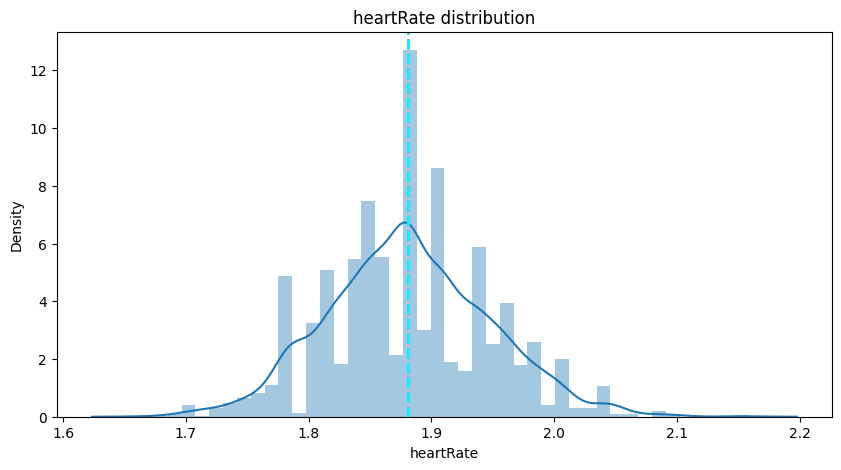

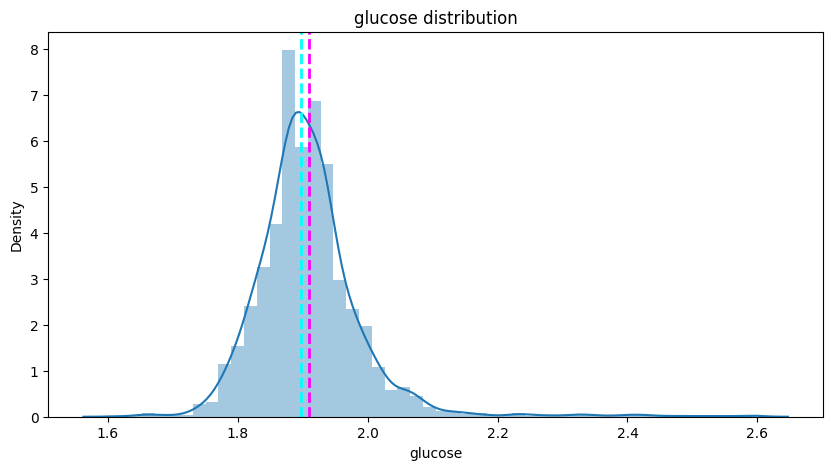

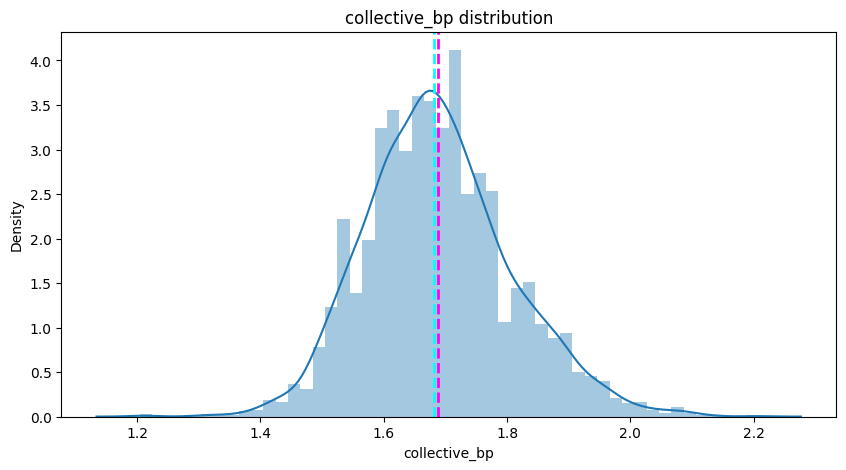

In [53]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

# **Data Preprocessing:**

In [54]:
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [55]:
from sklearn.metrics import recall_score
# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

## Train Test Split:

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [57]:
y_train.value_counts()

0.0    2015
1.0     358
Name: TenYearCHD, dtype: int64

In [58]:
y_test.value_counts()

0.0    864
1.0    153
Name: TenYearCHD, dtype: int64

In [59]:
X_train[continuous_var].skew(axis = 0)

age             -0.035936
cigsPerDay       0.297586
totChol          0.063375
BMI              0.338983
heartRate        0.176200
glucose          2.482536
collective_bp    0.324104
dtype: float64

In [60]:
# imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['totChol', 'BMI', 'heartRate', 'glucose','collective_bp']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()
     

In [61]:
X_train[continuous_var].skew(axis = 0)

age             -0.035936
cigsPerDay       0.297586
totChol         -0.046628
BMI              0.215412
heartRate        0.074472
glucose          0.379615
collective_bp    0.270388
dtype: float64

<Axes: title={'center': 'Target variable before SMOTE'}>

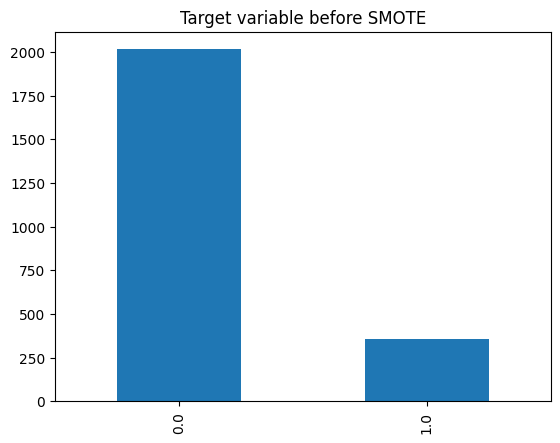

In [62]:
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')


In [63]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2373
Samples in the resampled dataset 4030


<Axes: title={'center': 'Target variable after SMOTE'}>

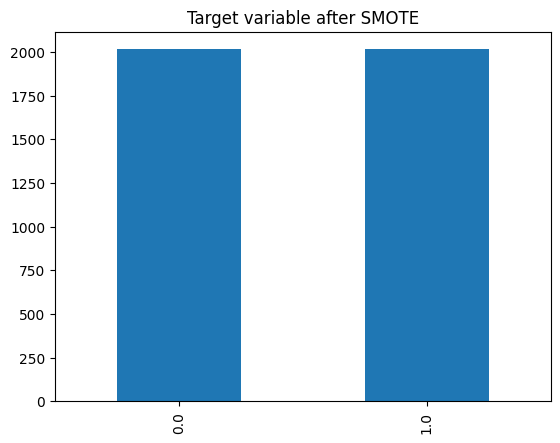

In [64]:
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')


In [65]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [66]:
X_train_scaled.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,collective_bp
0,1.352753,1.042877,1.126340,1.014005,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.279319,-0.546622,-0.267146,-0.521222,0.021221
1,0.238381,-0.929033,1.126340,1.014005,1.418967,-0.178155,-0.087426,-0.685091,-0.171759,0.165020,0.828332,-0.454995,-1.079829,-0.058061
2,0.872536,-0.929033,1.126340,1.014005,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.714396,0.670299,-0.175143,1.533689,-0.392623
3,1.444209,-0.929033,-0.887831,-0.986189,-0.926396,-0.178155,-0.087426,1.459660,-0.171759,2.429594,0.459589,0.841085,1.727057,1.281191
4,0.457551,-0.929033,-0.887831,1.014005,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.211021,-1.740096,-0.454995,-0.432546,0.021221


In [67]:
X_smote_scaled.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,collective_bp
0,1.197135,1.119926,1.060880,0.975971,1.082929,-0.205829,-0.11002,-0.803065,-0.215984,0.196411,-0.650557,-0.307845,-0.558477,-0.144994
1,0.016395,-0.864615,1.060880,0.975971,1.345589,-0.205829,-0.11002,-0.803065,-0.215984,0.073162,0.798109,-0.507333,-1.133177,-0.225798
2,0.688318,-0.864615,1.060880,0.975971,1.082929,-0.205829,-0.11002,-0.803065,-0.215984,0.665556,0.631605,-0.210142,1.555633,-0.566781
3,1.294038,-0.864615,-0.949145,-1.024621,-0.970339,-0.205829,-0.11002,1.248731,-0.215984,2.515061,0.409598,0.869052,1.754571,1.139157
4,0.248618,-0.864615,-0.949145,0.975971,1.082929,-0.205829,-0.11002,-0.803065,-0.215984,0.122766,-1.908013,-0.507333,-0.467246,-0.144994


In [68]:
X_test_scaled.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,collective_bp
0,-1.753764,0.127655,1.060880,0.975971,1.082929,-0.205829,-0.11002,1.248731,-0.215984,0.388492,0.790734,0.438917,-1.545216,-0.749085
1,-0.737999,2.112196,1.060880,0.975971,0.238048,-0.205829,-0.11002,1.248731,-0.215984,-0.259657,0.912695,-1.836863,0.462927,0.962338
2,-1.446041,0.127655,-0.949145,-1.024621,-0.970339,-0.205829,-0.11002,-0.803065,-0.215984,-1.481658,-1.400084,-0.507333,-0.028606,-0.350216
3,-0.349248,-0.864615,-0.949145,-1.024621,-0.970339,-0.205829,-0.11002,-0.803065,-0.215984,0.973419,0.456085,-0.307845,-0.200680,0.378292
4,-0.873239,0.127655,-0.949145,0.975971,1.345589,-0.205829,-0.11002,-0.803065,-0.215984,0.196411,-0.334160,-1.141373,0.055825,-0.435411


# **Model Implementation:**

## Logistic Regression

In [69]:
lr_model = LogisticRegression()

In [70]:
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [71]:
lr_train_pred = lr_model.predict(X_smote_scaled)

In [72]:
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.6992555831265509

In [73]:
lr_test_pred = lr_model.predict(X_test_scaled)

In [74]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.6601307189542484

In [75]:
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78       864
         1.0       0.27      0.66      0.38       153

    accuracy                           0.67      1017
   macro avg       0.59      0.67      0.58      1017
weighted avg       0.82      0.67      0.72      1017



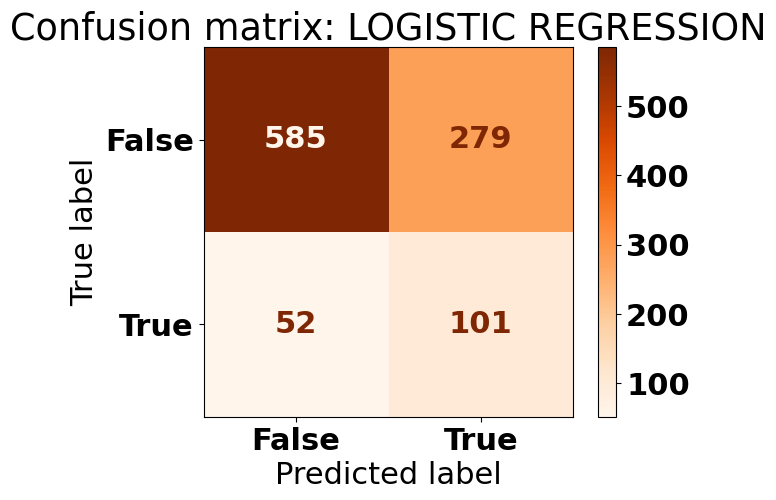

In [76]:

# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

## kNN

In [77]:

# Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)


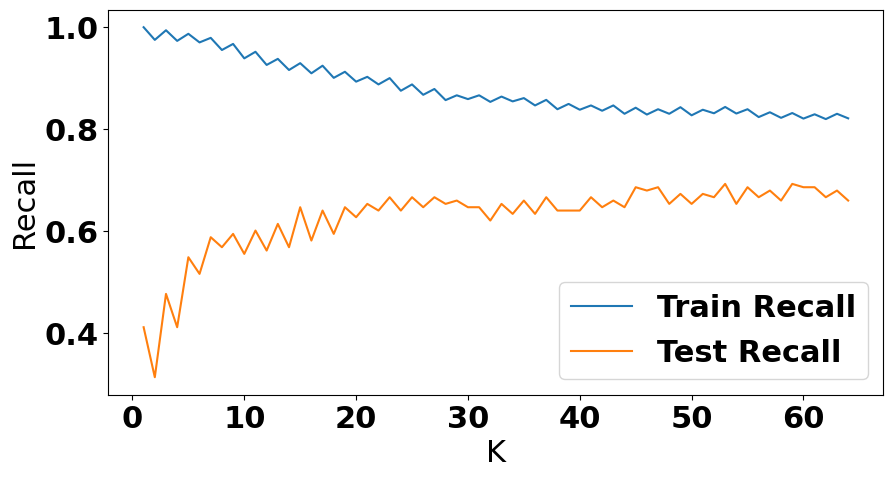

In [78]:
# Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()

In [79]:
best_k = knn_test_res.index(max(knn_test_res))+1
best_k
     

53

In [80]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
     

# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=53)

In [81]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)
     

# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.6928104575163399

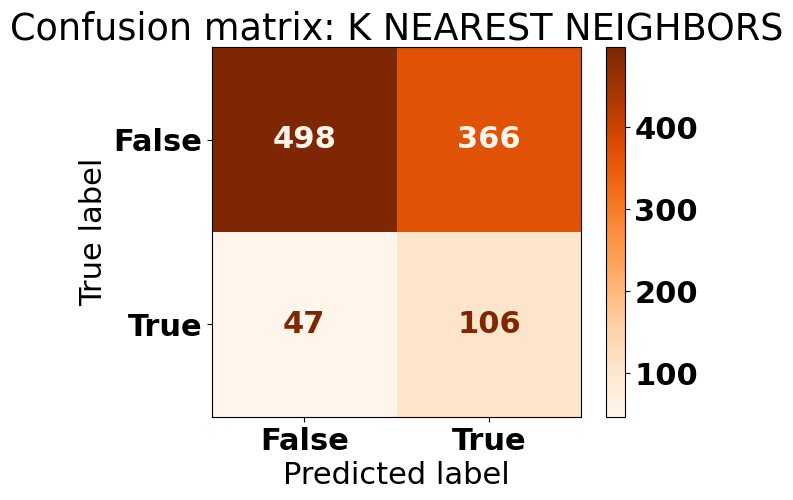

In [82]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

## Decision tree:

In [83]:
# Using stratified k fold cross validation so that each split 
# has almost equal proportion of classification results
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3, 
                                    random_state=0)
     

In [84]:
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [85]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_
     

In [86]:
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [87]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [88]:
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [89]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)
     

# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.8481389578163772

In [90]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)
     

# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [91]:
print(classification_report(y_test,dt_test_pred))


              precision    recall  f1-score   support

         0.0       0.92      0.47      0.62       864
         1.0       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

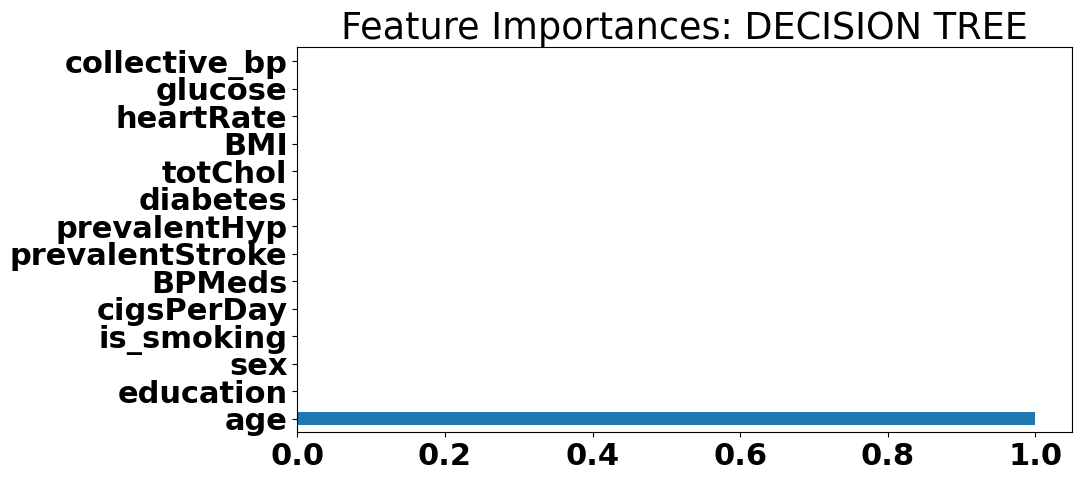

In [92]:
dt_feat_imp = pd.Series(dt_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

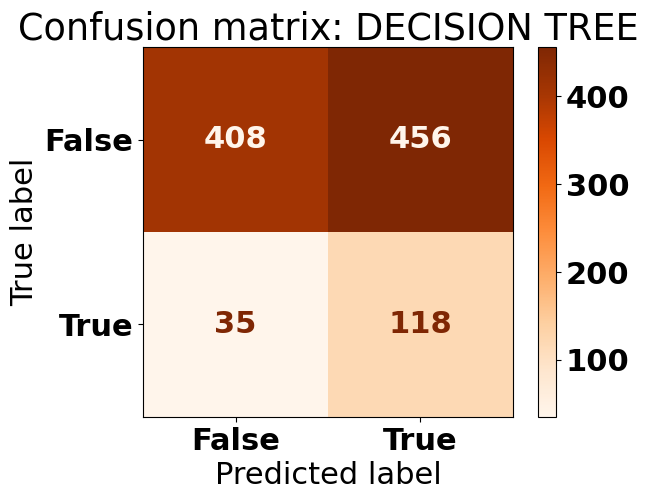

In [93]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

# **Naive Bayes:**

In [94]:
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3, 
                                    random_state=0)

In [95]:
nb_model=GaussianNB()

In [96]:
nb_model=GaussianNB()
nb_params={'var_smoothing':np.logspace(0,-9,num=100)}

In [97]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_
     

# model best parameters
nb_best_params
     

{'var_smoothing': 1.0}

In [98]:

# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])
     

# training the model
nb_model.fit(X_smote_scaled, y_smote)
     

GaussianNB(var_smoothing=1.0)

In [99]:
nb_train_pred = nb_model.predict(X_smote_scaled)
     

# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.49280397022332506

In [100]:
nb_test_pred = nb_model.predict(X_test_scaled)
     

# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.43137254901960786

In [101]:
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       864
         1.0       0.31      0.43      0.36       153

    accuracy                           0.77      1017
   macro avg       0.60      0.63      0.61      1017
weighted avg       0.80      0.77      0.78      1017



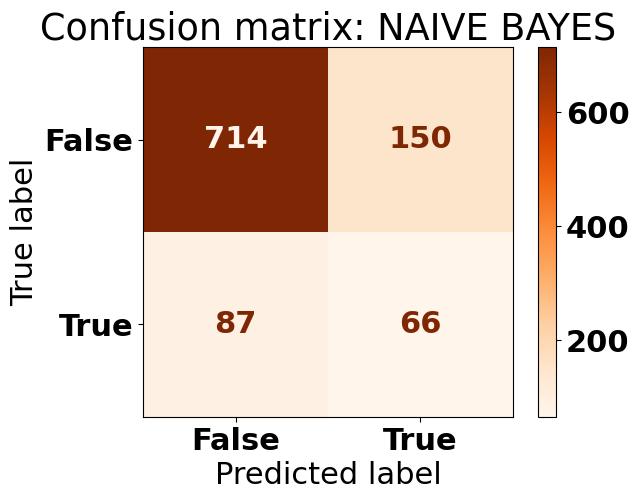

In [102]:
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

# **SVM**

In [103]:
# SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }
     

# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [104]:
svm_best_params


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [105]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [106]:
# training the model 
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=10, gamma=0.01)

In [107]:
# Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)

In [108]:
# training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.7796526054590571

In [109]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)
     

# Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.5751633986928104

In [110]:
# Classification report
print(classification_report(y_test,svm_test_pred))
     

              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77       864
         1.0       0.24      0.58      0.34       153

    accuracy                           0.66      1017
   macro avg       0.57      0.62      0.55      1017
weighted avg       0.80      0.66      0.70      1017



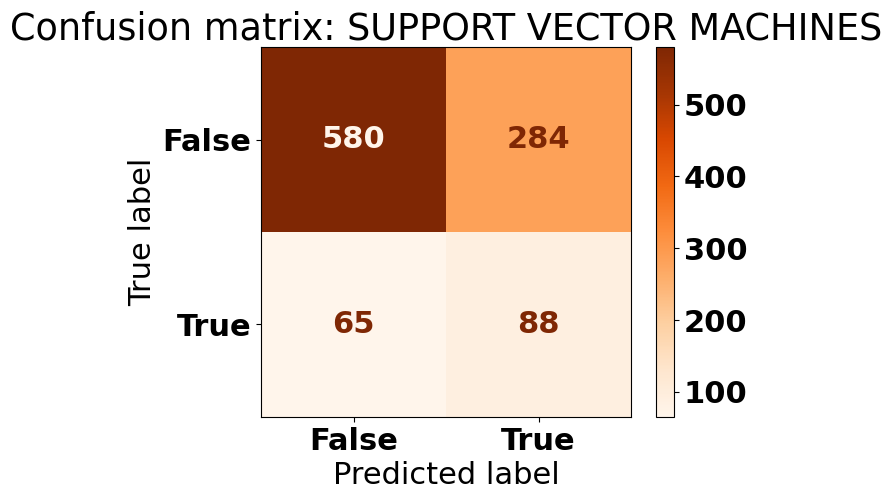

In [111]:
# Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

# **Random forest**

In [112]:
# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}
   

In [113]:
# using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_

In [114]:
# best parameters for random forests
rf_best_params

# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)
     

In [115]:

# fit
rf_model.fit(X_smote,y_smote)
     

# train predictions
rf_train_pred = rf_model.predict(X_smote)


In [116]:
# train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall


0.7096774193548387

In [117]:
rf_test_pred = rf_model.predict(X_test)


In [118]:
# test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall
    

0.6601307189542484

In [119]:
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.64      0.76       864
         1.0       0.25      0.66      0.36       153

    accuracy                           0.65      1017
   macro avg       0.58      0.65      0.56      1017
weighted avg       0.81      0.65      0.70      1017



<Axes: title={'center': 'Feature Importances: RANDOM FORESTS'}>

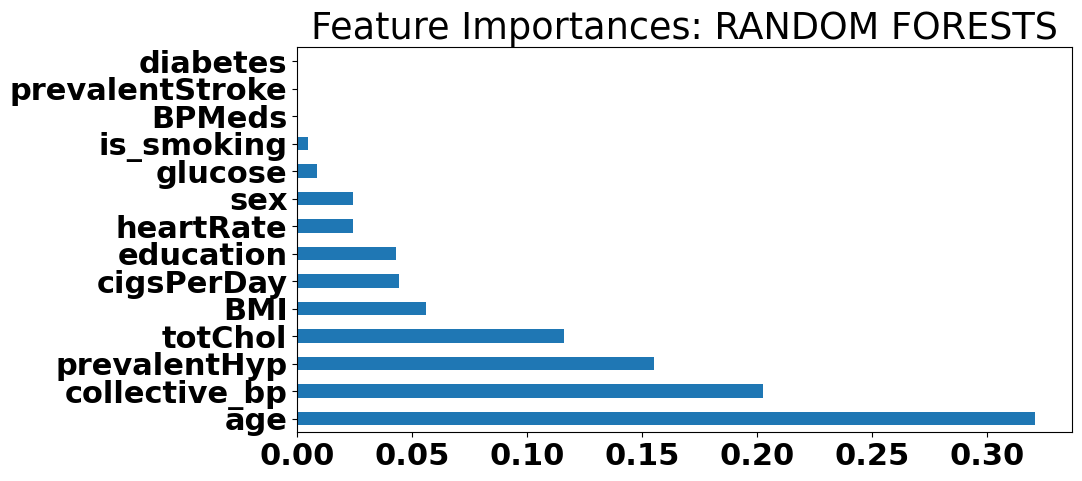

In [120]:

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

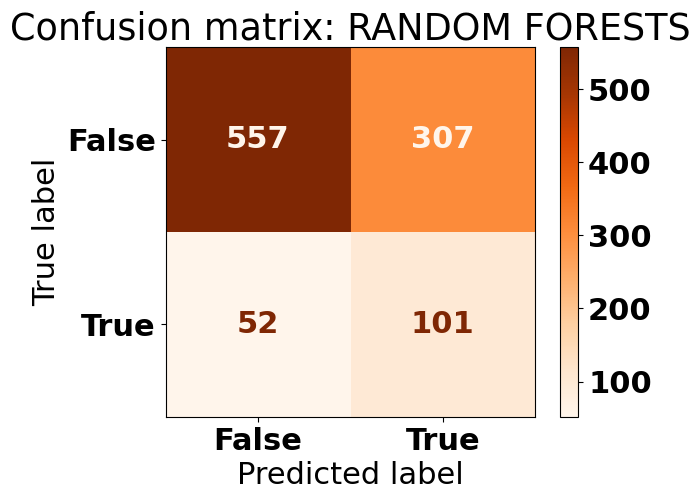

In [121]:
# Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

# **XG BOOST**

In [122]:
import xgboost as xgb

In [123]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [124]:
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

[09:02:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[09:02:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[09:02:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[09:02:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[09:02:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[09:02:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[09:02:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[09:02:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[09:02:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

In [125]:
xgb_best_params


{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [126]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [127]:
xgb_model.fit(X_smote_scaled,y_smote)

[09:06:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, min_samples_leaf=0.1,
              min_samples_split=0.1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None, ...)

In [128]:
# train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [129]:
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

0.8094292803970223

In [130]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [131]:
# test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

0.49019607843137253

In [132]:
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82       864
         1.0       0.26      0.49      0.34       153

    accuracy                           0.71      1017
   macro avg       0.58      0.62      0.58      1017
weighted avg       0.80      0.71      0.75      1017



<Axes: title={'center': 'Feature Importances: XG BOOST'}>

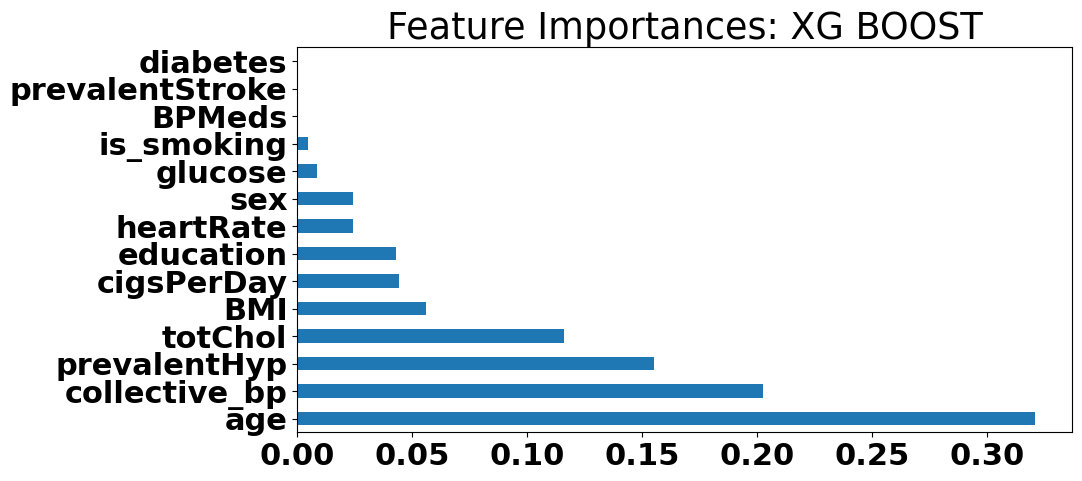

In [133]:
xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

In [134]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.89      0.75      0.82       864
    Positive       0.26      0.49      0.34       153

    accuracy                           0.71      1017
   macro avg       0.58      0.62      0.58      1017
weighted avg       0.80      0.71      0.75      1017



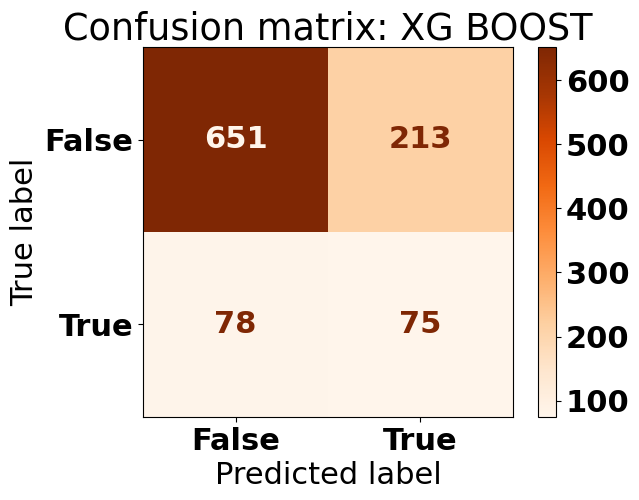

In [135]:
# Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG BOOST')
plt.show()

In [136]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_train_recall*100,lr_test_recall*100])
test.add_row(['2','K Nearest Neighbors',knn_train_recall*100,knn_test_recall*100])
test.add_row(['3','Naive Bayes',nb_train_recall*100,nb_test_recall*100])
test.add_row(['4','Decision Tree',dt_train_recall*100,dt_test_recall*100])
test.add_row(['5','Support Vector Machines',svm_train_recall*100,svm_test_recall*100])
test.add_row(['6','Random Forests',rf_train_recall*100,rf_test_recall*100])
test.add_row(['7','XG Boost',xgb_train_recall*100,xgb_test_recall*100])

print(test)

+---------+-------------------------+-------------------+-------------------+
| Sl. No. |   Classification Model  |  Train Recall (%) |  Test Recall (%)  |
+---------+-------------------------+-------------------+-------------------+
|    1    |   Logistic Regression   | 69.92555831265508 | 66.01307189542483 |
|    2    |   K Nearest Neighbors   | 82.13399503722084 | 69.28104575163398 |
|    3    |       Naive Bayes       | 49.28039702233251 | 43.13725490196079 |
|    4    |      Decision Tree      | 84.81389578163771 | 77.12418300653596 |
|    5    | Support Vector Machines |  77.9652605459057 | 57.51633986928104 |
|    6    |      Random Forests     | 70.96774193548387 | 66.01307189542483 |
|    7    |         XG Boost        | 80.94292803970224 | 49.01960784313725 |
+---------+-------------------------+-------------------+-------------------+


## **5. Solution to Business Objective**

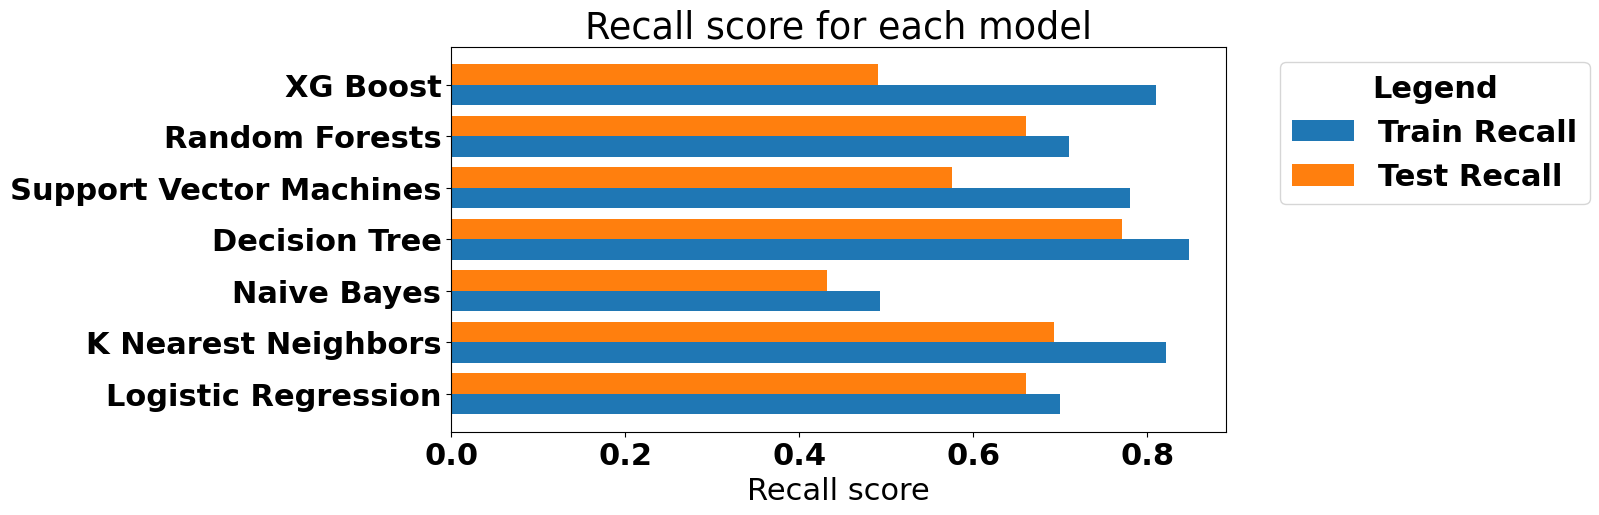

In [137]:
ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,rf_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,rf_test_recall,xgb_test_recall]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

# **Conclusion**

*  Here as we can observe the diabetes,diaBpstroke prevent were least importent feature in determining the risk of CHD.
*   Also age of person is most importent feature in determining the risk of patienting CHD followed by pluse pressure, prevent hypothesis and total cholestrol


*   we get a recall score of 0.67.
*   Here we trained almost 7 models to get our perfect model.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***